# Spaceship Titanic

- Utilizaando os [dados disponíveis no Kaggle](https://www.kaggle.com/competitions/spaceship-titanic)
    - Dataset de **competição**
    - O resultado é avaliado através da **acurácia**

### Importando novamente as bases e fazendo o tratando dos dados
- Importando oque foi feito na [Parte 2 - Tratando Colunas](https://github.com/PedroALage/Projetos/blob/main/Data_Science/Spaceship_Titanic/Parte2_TratandoColunas.ipynb)

In [51]:
# Importando o pandas
import pandas as pd

In [52]:
# Visualizando a base de treino
treino = pd.read_csv('treino_trat2.csv')
treino.head(3)

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,VIPCheck,CryoSCheck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,False,0,0,0,1,0,0,0,1
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,True,0,0,1,0,0,0,0,1
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,1,0,0,0,1


In [53]:
# Visualizando a base de teste
teste = pd.read_csv('teste_trat2.csv')
teste.head(3)

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,VIPCheck,CryoSCheck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0013_01,27.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,1
1,0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,0,0,1,0,0,0,0,1
2,0019_01,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,1,0,0


### Modelo de controle
- O modelo pode ser usado para comparar as acurácias acançadas [utilizar essa base no modelo](#modelo)

<a id='ajustes'></a>
### Ajustes nos dados para melhorar o resultado do modelo
- [Analisando a escala dos dados](#escala)
- [Entendendo as colunas](#colunas)
- [Selecionando as melhores variáveis do modelo](#f_selection)
    - [Entendendo agora as **colunas de família**](#Familia)

<a id='escala'></a>
#### Analisando a escala dos dados

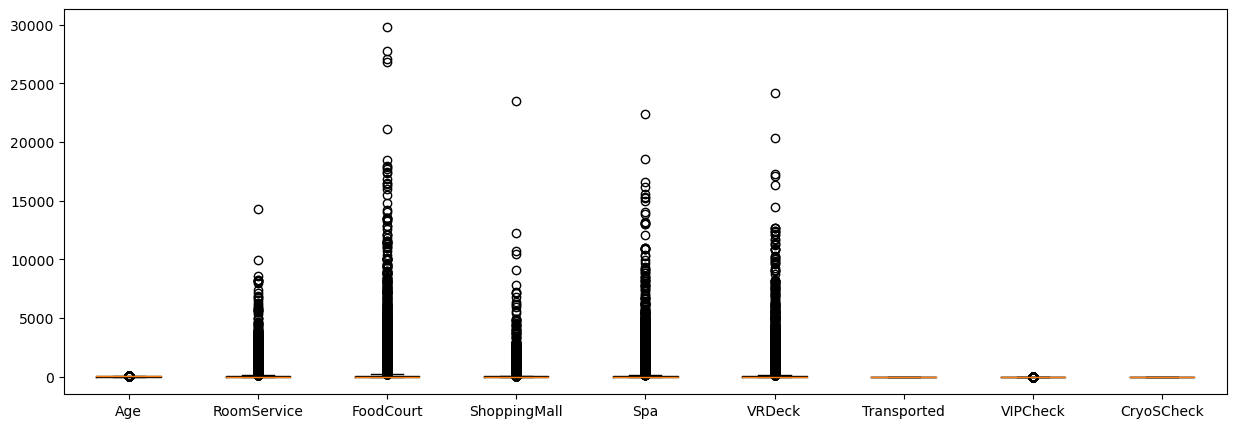

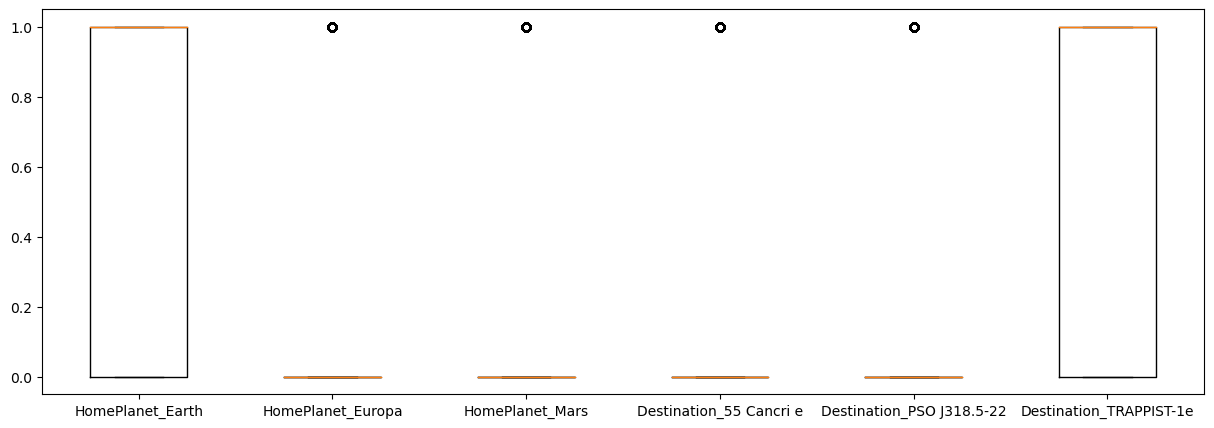

In [54]:
# Visualizando a escala desses dados
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))
ax.boxplot(treino.iloc[:,1:10])
ax.set_xticks(range(1,treino.iloc[:,1:10].shape[1]+1),treino.iloc[:,1:10].columns)

fig, ax = plt.subplots(figsize=(15,5))
ax.boxplot(treino.iloc[:,10:16])
ax.set_xticks(range(1,treino.iloc[:,10:16].shape[1]+1),treino.iloc[:,10:16].columns)

plt.show()

- As colunas **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** estão em uma escala muito diferente das outras, será necessário fazer um ajuste nessas escalas
    - **[Ajustes de escala do próprio Scikit-Learn](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)**
    - Como essas colunas possuem outliers, podemos começar tentando utilizar o **[RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)**

In [55]:
# Importando o RobustScaler
from sklearn.preprocessing import RobustScaler

In [56]:
# Criando o scaler
transformer = RobustScaler().fit(treino[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

In [57]:
# Fazendo o transformação dos dados
treino[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = transformer.transform(treino[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

In [58]:
# Fazendo o mesmo para a base de teste
transformer = RobustScaler().fit(teste[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
teste[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = transformer.transform(teste[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

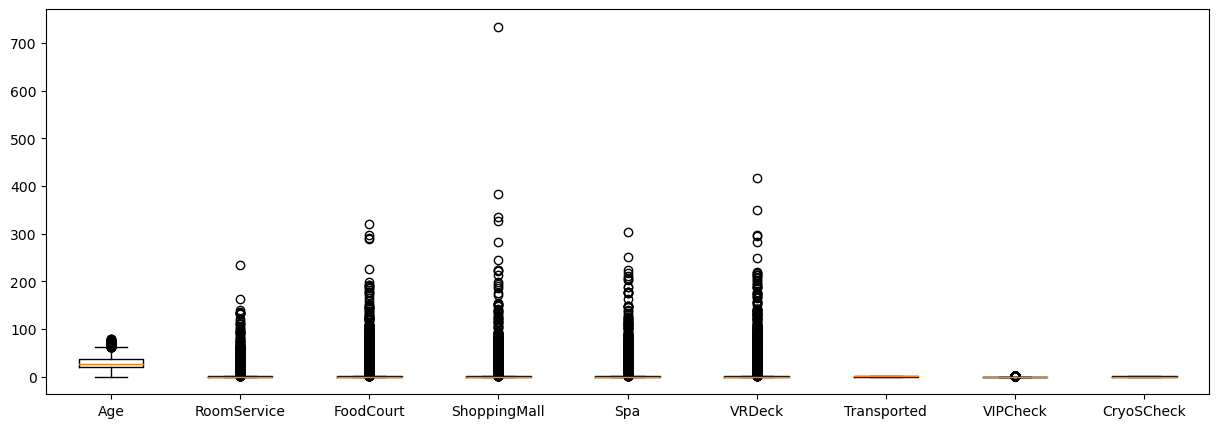

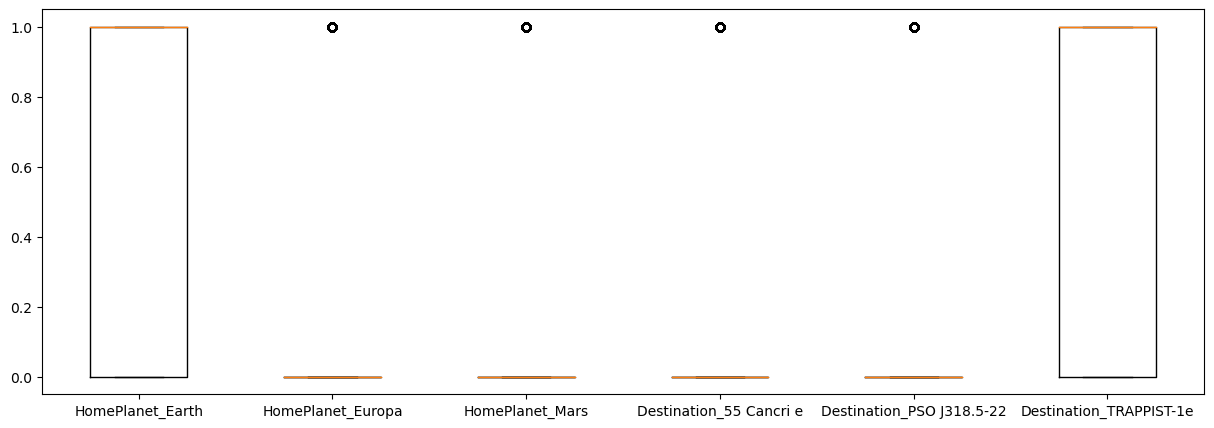

In [59]:
# Visualizando novamente os dados

fig, ax = plt.subplots(figsize=(15,5))
ax.boxplot(treino.iloc[:,1:10])
ax.set_xticks(range(1,treino.iloc[:,1:10].shape[1]+1),treino.iloc[:,1:10].columns)

fig, ax = plt.subplots(figsize=(15,5))
ax.boxplot(treino.iloc[:,10:16])
ax.set_xticks(range(1,treino.iloc[:,10:16].shape[1]+1),treino.iloc[:,10:16].columns)

plt.show()

- [Utilizar essa base no modelo](#modelo) para verificar o resultado

<a id='colunas'></a>
#### Entendendo as colunas
- Agora podemos entender a relação entre as colunas e o resultado
- Tentar identificar o impacto de cada uma no resultado
- Podemos verificar quantas pessoas sobreviveram em cada um dos valores dessa coluna

In [60]:
# Visualizando a base
treino.head(3)

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,VIPCheck,CryoSCheck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,39.0,0.000000,0.000000,0.00000,0.000000,0.000000,False,0,0,0,1,0,0,0,1
1,0002_01,24.0,1.786885,0.096774,0.78125,7.418919,0.758621,True,0,0,1,0,0,0,0,1
2,0003_01,58.0,0.704918,38.451613,0.00000,90.743243,0.844828,False,1,0,0,1,0,0,0,1


In [61]:
# Verificando a tranporte para CryoSleep
treino.groupby('CryoSCheck')['Transported'].agg(['sum', 'count', 'mean'])

,sum,count,mean
CryoSCheck,,,
0,1824,5558,0.328176
1,2554,3135,0.814673


In [62]:
# Verificando a tranporte para VIP
treino.groupby('VIPCheck')['Transported'].agg(['sum', 'count', 'mean'])

,sum,count,mean
VIPCheck,,,
0,4302,8494,0.506475
1,76,199,0.381910


In [63]:
# Verificando a tranporte para Age
Age_df = treino.groupby('Age')['Transported'].agg(['sum', 'count', 'mean']).reset_index()
Age_df.columns = ['Idade','Transportado','Total','Tax_trans']
Age_df

,Idade,Transportado,Total,Tax_trans
0,0.0,144,178,0.808989
1,1.0,49,67,0.731343
2,2.0,53,75,0.706667
3,3.0,59,75,0.786667
4,4.0,53,71,0.746479
...,...,...,...,...
75,75.0,2,4,0.500000
76,76.0,1,2,0.500000
77,77.0,1,2,0.500000
78,78.0,1,3,0.333333


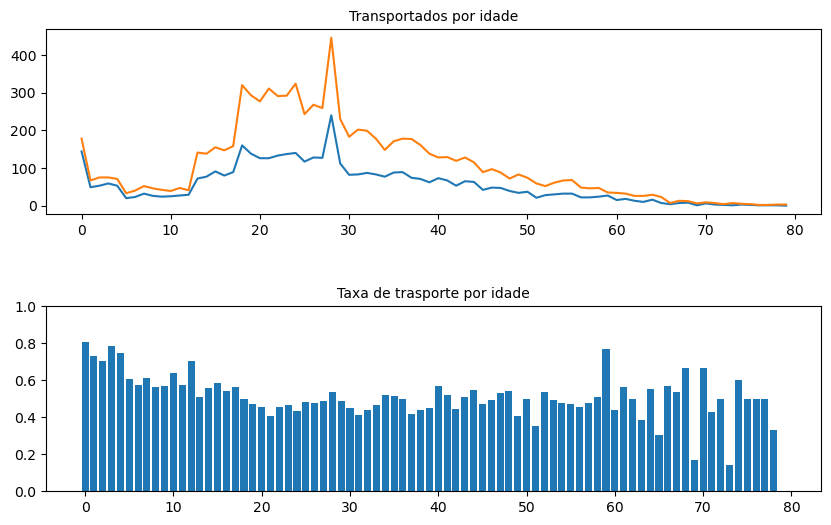

In [64]:
# Visualizando essas informações graficamente
fig, ax = plt.subplots(ncols=1,nrows=2,figsize=(10,6))

ax[0].plot(Age_df.Idade, Age_df.Transportado)
ax[0].plot(Age_df.Idade, Age_df.Total)
ax[0].set_title('Transportados por idade', fontsize=10)

labels1 = ax[1].bar(Age_df.Idade, Age_df.Tax_trans)
ax[1].set(ylim=(0,1))
ax[1].set_title('Taxa de trasporte por idade', fontsize=10)

plt.subplots_adjust(hspace=0.5)

plt.show()

- **Insights**
    - Pessoas viajando em sono criogênico tem maior taxa de transporte
    - Pessoas com menos de 6 anos tem maior taxa de transporte
        - Podemos criar uma nova coluna identificando se o passageiro tem menos de 6 anos e está em sono criogênico 

In [65]:
# Criando uma função para verificar se idade e formato de viagem
def menor6(idade, sono):
    if (idade < 6 and sono == 1):
        return 1
    else:
        return 0

In [66]:
# Aplicando essa função na base de treino
treino['JovemSono'] = treino.apply(lambda x: menor6(x.Age, x.CryoSCheck), axis=1)

In [67]:
# Fazendo o mesmo para a base de teste
teste['JovemSono'] = teste.apply(lambda x: menor6(x.Age, x.CryoSCheck), axis=1)

- Podemos já [utilizar essa base no modelo](#modelo) para verificar o resultado

<a id="f_selection"></a>
#### Selecionando os melhores recursos
- Primeiramente precisamos analisar qual a **correlação entre as variáveis** e verificar se não existem variáveis que estão basicamente "dizendo a mesma coisa"

In [292]:
# Visualizando a base
treino.head(3)

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,VIPCheck,CryoSCheck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,JovemSono
0,0001_01,39.0,0.000000,0.000000,0.00000,0.000000,0.000000,False,0,0,0,1,0,0,0,1,0
1,0002_01,24.0,1.786885,0.096774,0.78125,7.418919,0.758621,True,0,0,1,0,0,0,0,1,0
2,0003_01,58.0,0.704918,38.451613,0.00000,90.743243,0.844828,False,1,0,0,1,0,0,0,1,0


In [293]:
# Analisando a correlação entre as variáveis
treino.corr()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,VIPCheck,CryoSCheck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,JovemSono
PassengerId,1.000000,-0.009235,-0.000159,-0.009238,0.017510,-0.005051,0.015414,0.021491,0.013608,-0.004304,0.002833,0.004946,-0.008802,-0.001458,0.013533,-0.007238,-0.005249
Age,-0.009235,1.000000,0.068485,0.127765,0.033132,0.121227,0.099585,-0.074245,0.091709,-0.077525,-0.200984,0.217404,0.015969,0.016758,-0.028191,0.002928,-0.338004
RoomService,-0.000159,0.068485,1.000000,-0.013961,0.054769,0.011347,-0.017784,-0.243313,0.056974,-0.253653,-0.139839,-0.067379,0.245221,-0.024263,-0.063313,0.061382,-0.061044
FoodCourt,-0.009238,0.127765,-0.013961,1.000000,-0.012321,0.221677,0.225346,0.044270,0.126098,-0.213926,-0.214439,0.364722,-0.125118,0.134844,-0.065576,-0.078062,-0.051483
ShoppingMall,0.017510,0.033132,0.054769,-0.012321,1.000000,0.015190,-0.005773,0.007948,0.018975,-0.215792,-0.071896,-0.021221,0.111707,-0.013630,-0.031717,0.032056,-0.051932
Spa,-0.005051,0.121227,0.011347,0.221677,0.015190,1.000000,0.148997,-0.220069,0.060672,-0.206100,-0.158443,0.265763,-0.088463,0.074820,-0.053397,-0.032593,-0.049600
VRDeck,0.015414,0.099585,-0.017784,0.225346,-0.005773,0.148997,1.000000,-0.206198,0.123168,-0.200410,-0.153328,0.281933,-0.112107,0.089707,-0.045104,-0.051000,-0.048231
Transported,0.021491,-0.074245,-0.243313,0.044270,0.007948,-0.220069,-0.206198,1.000000,-0.037261,0.467230,-0.168845,0.176916,0.019544,0.108722,0.000092,-0.096319,0.090050
VIPCheck,0.013608,0.091709,0.056974,0.126098,0.018975,0.060672,0.123168,-0.037261,1.000000,-0.081318,-0.162345,0.147008,0.043523,0.045167,-0.000592,-0.039617,-0.027665
CryoSCheck,-0.004304,-0.077525,-0.253653,-0.213926,-0.215792,-0.206100,-0.200410,0.467230,-0.081318,1.000000,-0.109911,0.096059,0.033180,0.064950,0.087161,-0.112434,0.240659


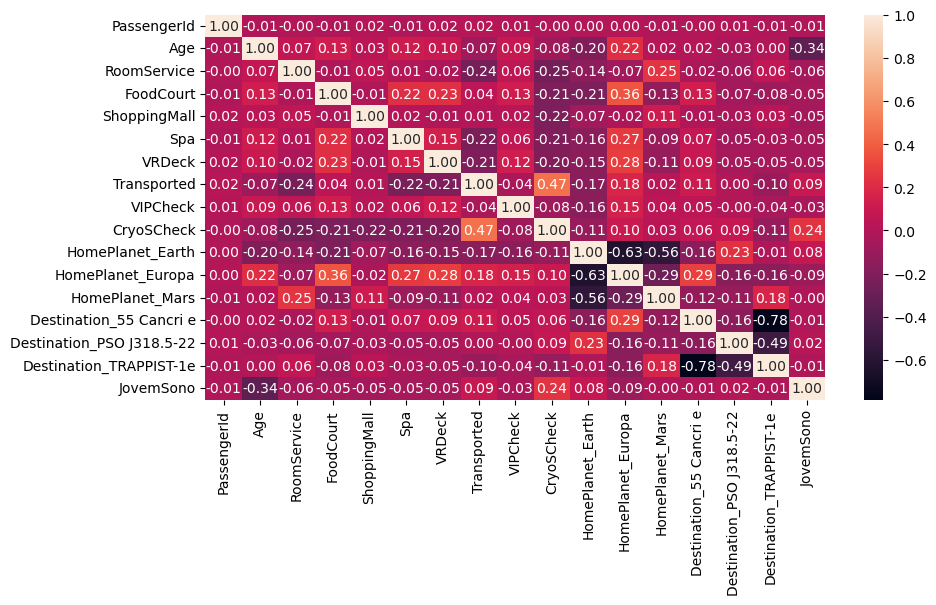

In [294]:
# Tornando a correlação mais visual
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,5))

sns.heatmap(treino.corr(), annot=True, fmt=".2f")

plt.show()

- Podemos usar a regressão logística e a árvore de classificação para verificar a importância de cada uma dessas colunas

In [295]:
# Separando X e y
X = treino.drop(['PassengerId','Transported'],axis=1)
y = treino.Transported

In [296]:
# Usando a regressão logística nos dados
clf_rl = LogisticRegression(random_state=42,max_iter=1000).fit(X,y)

In [297]:
# Verificando a importância
clf_rl.coef_[0]

array([-0.00851684, -0.08844822,  0.04770816,  0.01743283, -0.1413131 ,
       -0.10257436, -0.41506777,  1.26482084, -0.74992912,  1.34596401,
       -0.09472233,  0.46847571,  0.02708526,  0.00575159, -0.20012286])

In [298]:
# Agora usando a árvore de classificação
clf_ac = tree.DecisionTreeClassifier(random_state=42).fit(X,y)

In [299]:
# Verificando a importância
clf_ac.feature_importances_

array([0.12181458, 0.09352127, 0.1118769 , 0.07371677, 0.11165552,
       0.13095981, 0.00217578, 0.26844677, 0.04955998, 0.00685706,
       0.00289987, 0.00832874, 0.01009117, 0.00733973, 0.00075605])

In [300]:
# Criando um DataFrame
imp = pd.DataFrame({
    'colunas': X.columns,
    'regLog': clf_rl.coef_[0],
    'Arvore': clf_ac.feature_importances_
})

imp

,colunas,regLog,Arvore
0,Age,-0.008517,0.121815
1,RoomService,-0.088448,0.093521
2,FoodCourt,0.047708,0.111877
3,ShoppingMall,0.017433,0.073717
4,Spa,-0.141313,0.111656
5,VRDeck,-0.102574,0.130960
6,VIPCheck,-0.415068,0.002176
7,CryoSCheck,1.264821,0.268447
8,HomePlanet_Earth,-0.749929,0.049560
9,HomePlanet_Europa,1.345964,0.006857


In [301]:
# Podemos apenas manter as colunas mais relevantes
treino = treino.drop(['RoomService', 'ShoppingMall', 'HomePlanet_Mars', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'], axis=1)
teste = teste.drop(['RoomService', 'ShoppingMall', 'HomePlanet_Mars', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'], axis=1)

<a id='modelo'></a> 
### Usando essa nova base no modelo

In [68]:
# Exportando as alterações na base para um csv
treino.to_csv('treino_trat3.csv', index=False)
teste.to_csv('teste_trat3.csv', index=False)

In [69]:
# Visualizando a base
treino.head(3)

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,VIPCheck,CryoSCheck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,JovemSono
0,0001_01,39.0,0.000000,0.000000,0.00000,0.000000,0.000000,False,0,0,0,1,0,0,0,1,0
1,0002_01,24.0,1.786885,0.096774,0.78125,7.418919,0.758621,True,0,0,1,0,0,0,0,1,0
2,0003_01,58.0,0.704918,38.451613,0.00000,90.743243,0.844828,False,1,0,0,1,0,0,0,1,0


- Podemos selecionar os mesmos modelos que vimos anteriormente (consulte arquivo da **[parte 1](https://github.com/lucaslealx/Titanic/blob/main/Parte1.ipynb)**)
    - **Árvore de classificação**
        - https://scikit-learn.org/stable/modules/tree.html#classification
    - **Classificação dos vizinhos mais próximos**
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
    - **Regressão Logística**
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
- Antes de usar os algoritmos, precisamos separar a base de treino em **treino e validação**
    - Vamos fazer isso utilizando o **train_test_split**
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [70]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [71]:
# Separando a base de treino em X e y
X = treino.drop(['PassengerId','Transported'],axis=1)
y = treino.Transported

In [72]:
# Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

- **Árvore de classificação**

In [73]:
# Fazendo a importação
from sklearn import tree

In [74]:
# Criando o classificador
clf_ac = tree.DecisionTreeClassifier(random_state=42)

In [75]:
# Fazendo o fit com os dados
clf_ac = clf_ac.fit(X_train,y_train)

In [76]:
# Fazendo a previsão
y_pred_ac = clf_ac.predict(X_val)

- **KNeighborsClassifier**

In [77]:
# Importando
from sklearn.neighbors import KNeighborsClassifier

In [78]:
# Criando o classificador
clf_knn = KNeighborsClassifier(n_neighbors=3)

In [79]:
# Fazendo o fit com os dados
clf_knn = clf_knn.fit(X_train,y_train)

In [80]:
# Fazendo a previsão
y_pred_knn = clf_knn.predict(X_val)

- **Regressão Logística**

In [81]:
# Importando
from sklearn.linear_model import LogisticRegression

In [82]:
# Criando o classificador
clf_rl = LogisticRegression(random_state=42,max_iter=1000)

In [83]:
# Fazendo o fit com os dados
clf_rl = clf_rl.fit(X_train,y_train)

In [84]:
# Fazendo a previsão
y_pred_rl = clf_rl.predict(X_val)

- Vamos novamente **avaliar os modelos**
    - Acurácia (método de avaliação usado na competição):
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    - Matriz de confusão (ajuda a visualizar a distribuição dos erros):
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

- Avaliando a **acurácia**

In [85]:
# Importando
from sklearn.metrics import accuracy_score

In [86]:
# Para a árvore
as_ac = accuracy_score(y_val, y_pred_ac)
as_ac

0.7396305332868596

In [87]:
# Para o knn
as_knn = accuracy_score(y_val, y_pred_knn)
as_knn

0.7507842453816661

In [88]:
# Para a regressão logística
as_rl = accuracy_score(y_val, y_pred_rl)
as_rl

0.776925758103869

- Podemos salvar esses valores em um DataFrame para visualizarmos nossa evolução

In [322]:
# # Criando primeiramente o DataFrame
# as_df = pd.DataFrame({
#     'modelos': ['arvore', 'knn', 'regLog'],
#     'inicial': [as_ac, as_knn, as_rl]
# })

# as_df

In [323]:
# Adicionando novas colunas no DafaFrame
# as_df['escala'] = [as_ac, as_knn, as_rl]
# as_df['jovemSono'] = [as_ac, as_knn, as_rl]
as_df['colunas'] = [as_ac, as_knn, as_rl]
as_df

,modelos,inicial,escala,jovemSono,colunas
0,arvore,0.735448,0.735796,0.739631,0.711746
1,knn,0.754967,0.750784,0.750784,0.727431
2,regLog,0.776577,0.776577,0.776926,0.755664


- Avaliando a **matriz de confusão**

In [89]:
# Importando
from sklearn.metrics import confusion_matrix

In [90]:
# Para a árvore
confusion_matrix(y_val, y_pred_ac)

array([[ 982,  442],
       [ 305, 1140]], dtype=int64)

In [91]:
# Para o knn
confusion_matrix(y_val, y_pred_knn)

array([[1015,  409],
       [ 306, 1139]], dtype=int64)

In [92]:
# Para a regressão logística
confusion_matrix(y_val, y_pred_rl)

array([[1048,  376],
       [ 264, 1181]], dtype=int64)

- **[Voltar](#ajustes)** e continuar fazendo os ajustes necessários na base

### Fazendo a previsão para os dados de teste
- Vamos usar o modelo com melhor precisão para fazer o predict na base de teste
    - Utilizandp até a nova coluna JovenSono, pois a remoção ocasionou em perda de acurácia

In [93]:
# Visualizando o X_train
X_train.head(3)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,VIPCheck,CryoSCheck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,JovemSono
4696,35.0,21.918033,0.526882,1.78125,0.000000,0.000000,0,0,0,0,1,0,0,1,0
5946,28.0,0.000000,1.634409,6.71875,0.405405,8.793103,0,0,1,0,0,0,0,1,0
227,43.0,0.000000,0.000000,0.00000,0.000000,0.000000,0,1,0,0,1,0,0,1,0


In [94]:
# Visualizando a base de teste
teste.head(3)

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,VIPCheck,CryoSCheck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,JovemSono
0,0013_01,27.0,0.0,0.000000,0.0,0.000000,0.0,0,1,1,0,0,0,0,1,0
1,0018_01,19.0,0.0,0.088235,0.0,44.809524,0.0,0,0,1,0,0,0,0,1,0
2,0019_01,31.0,0.0,0.000000,0.0,0.000000,0.0,0,1,0,1,0,1,0,0,0


In [95]:
# Para a base de teste ser igual a base de treino, precisamos eliminar a coluna de id
X_teste = teste.drop('PassengerId',axis=1)

In [96]:
# Utilizando a regressão logística na base de teste
y_pred = clf_rl.predict(X_teste)

In [97]:
# Criando uma nova coluna com a previsão na base de teste
teste['Transported'] = y_pred

In [98]:
# Selecionando apenas a coluna de Id e Survived para fazer o envio
base_envio = teste[['PassengerId','Transported']]

In [99]:
# Exportando para um csv
base_envio.to_csv('resultados3.csv',index=False)

## Resultado

- Modelo acertou 78,95% das avaliações
- Não apresentando almento em relação ao anterior
    
<img src="pkgImages/tentativa3.png" width=900>